# LSTM Time series (Keras/Tensorflow)

In [1]:
import IPython.display
import pandas as pd

from LSTM import *

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

figures saved to ../Figures/Modeling/LSTM


## Data exploration

In [2]:
# Load data
VM = load_VM('917.csv')
# Make it univariate
df = VM[['CPU usage [MHZ]']]
# df = VM

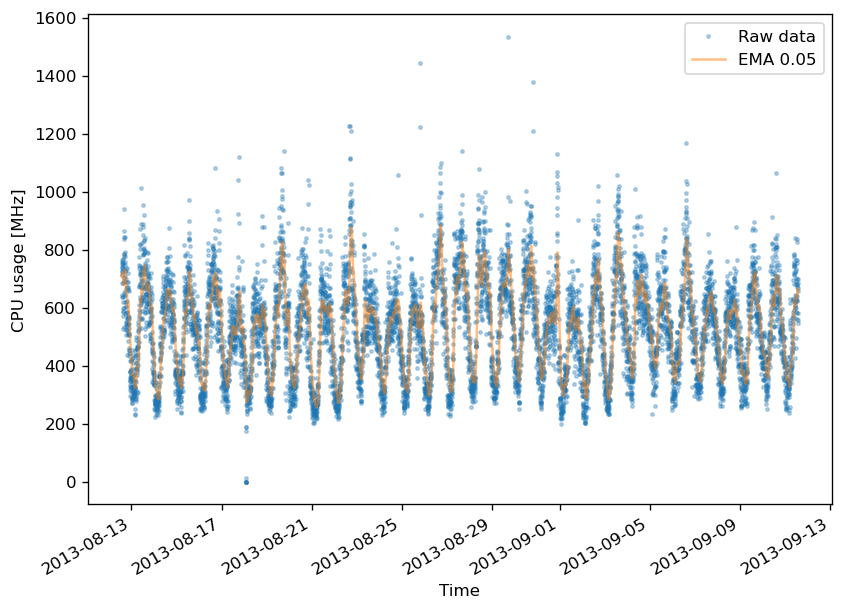

In [3]:
%matplotlib inline
plot_timeSeries(df['CPU usage [MHZ]'], ylabel='CPU usage [MHz]')

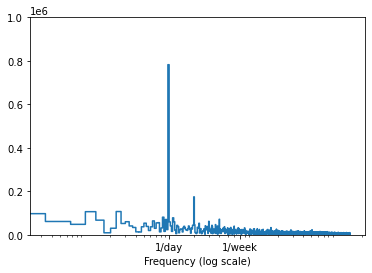

In [16]:
%matplotlib inline
fft = tf.signal.rfft(df['CPU usage [MHZ]'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(VM)
timestamps_per_day = 60*24/5
days_per_dataset = n_samples_h/ (timestamps_per_day)

f_per_day = f_per_dataset/days_per_dataset
plt.step(f_per_day, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 1000000)
# plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 7], labels=['1/day', '1/week'])
_ = plt.xlabel('Frequency (log scale)')

## Split the data

In [5]:
# (70%, 20%, 10%) split for the training, validation, and test sets
train_df, val_df, test_df = split_data(df)

## Normalizing the data

In [6]:
scaler = MinMaxScaler()
train_df, val_df, test_df = data_transformation(scaler, train_df, val_df, test_df)

## Adding daily info

In [8]:
df = add_daily_info(df)
# (70%, 20%, 10%) split for the training, validation, and test sets
train_df, val_df, test_df = split_data(df)

/Users/javier.galindos/Library/CloudStorage/OneDrive-FundaciónIMDEASoftware/Documents/Code/intern-project-javier/Modeling/LSTM.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
/Users/javier.galindos/Library/CloudStorage/OneDrive-FundaciónIMDEASoftware/Documents/Code/intern-project-javier/Modeling/LSTM.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
/Users/javier.galindos/Library/Cloud

Text(0.5, 1.0, 'Time of day signal')

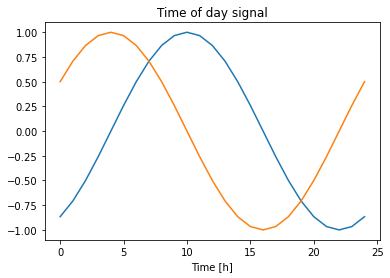

In [9]:
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

## LSTM

In [9]:
lstm_model = LstmModel(input_width=10,
                      label_width=1,
                      df=df,
                      train_df=train_df,
                      val_df=val_df,
                      test_df=test_df,
                      epoch=100,
                      units=20,
                      layers=1,
                      dropout=0,
                      )

In [11]:
# Magic func to use TensorBoard directly in IPython
%load_ext tensorboard

In [10]:
aux = lstm_model.window.train

In [12]:
log_dir = f'logs/fit/{lstm_model.name}'
%tensorboard --logdir=logdir

Launching TensorBoard...

In [7]:
IPython.display.clear_output()
history = lstm_model.compile_and_fit(patience=50)

Training:
Input shape (batch, time, features): (6030, 1, 1)
Labels shape (batch, time, features): (6030, 1, 1)
Output shape:(6030, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20)                1760      
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


2022-03-02 20:13:51.145409: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-02 20:13:51.529787: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-02 20:13:51.659563: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


16/48 [=========>....................] - ETA: 0s - loss: 0.1087 - mean_absolute_error: 0.3110

2022-03-02 20:13:51.763689: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


48/48 [==============================] - 2s 21ms/step - loss: 0.0825 - mean_absolute_error: 0.2645 - val_loss: 0.0491 - val_mean_absolute_error: 0.2022
Epoch 2/100
 1/48 [..............................] - ETA: 0s - loss: 0.0511 - mean_absolute_error: 0.2026

2022-03-02 20:13:52.680629: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-02 20:13:52.728256: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


48/48 [==============================] - 0s 8ms/step - loss: 0.0258 - mean_absolute_error: 0.1313 - val_loss: 0.0109 - val_mean_absolute_error: 0.0828
Epoch 3/100
48/48 [==============================] - 0s 8ms/step - loss: 0.0078 - mean_absolute_error: 0.0706 - val_loss: 0.0057 - val_mean_absolute_error: 0.0600
Epoch 4/100
48/48 [==============================] - 0s 8ms/step - loss: 0.0066 - mean_absolute_error: 0.0657 - val_loss: 0.0054 - val_mean_absolute_error: 0.0585
Epoch 5/100
48/48 [==============================] - 0s 9ms/step - loss: 0.0063 - mean_absolute_error: 0.0641 - val_loss: 0.0051 - val_mean_absolute_error: 0.0570
Epoch 6/100
48/48 [==============================] - 0s 9ms/step - loss: 0.0060 - mean_absolute_error: 0.0624 - val_loss: 0.0049 - val_mean_absolute_error: 0.0554
Epoch 7/100
48/48 [==============================] - 0s 9ms/step - loss: 0.0056 - mean_absolute_error: 0.0605 - val_loss: 0.0046 - val_mean_absolute_error: 0.0536
Epoch 8/100
48/48 [===============

Inference:
12/54 [=====>........................] - ETA: 0s - loss: 0.0025 - mean_absolute_error: 0.0394

2022-03-02 20:15:12.863730: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-02 20:15:12.903585: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


54/54 [==============================] - 0s 5ms/step - loss: 0.0023 - mean_absolute_error: 0.0365


TypeError: unsupported format string passed to list.__format__

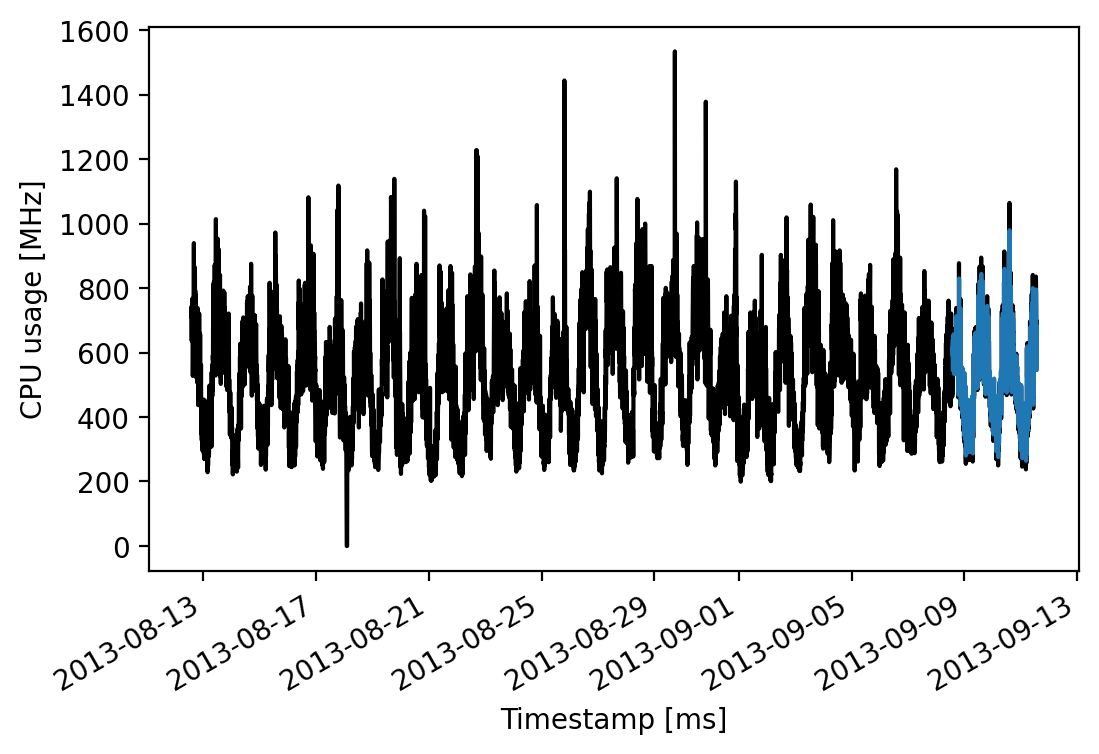

In [8]:
IPython.display.clear_output()
pred = lstm_model.prediction(scaler)

In [ ]:
performance_val, performance_test = lstm_model.evaluation(pred,scaler)

In [27]:
val_mape = lstm_model.model.evaluate(lstm_model.window.val[0], lstm_model.window.val[1])

53/53 [==============================] - 1s 10ms/step - loss: 0.0021 - mean_absolute_error: 0.0347


In [12]:
# Figure
%matplotlib tk
test_trf = scaler.inverse_transform(test_df)
test_df_trf = pd.DataFrame(data=test_trf, columns=test_df.columns, index=test_df.index)
fig = plt.figure(dpi=150)
plt.grid()
test_df_trf['CPU usage [MHZ]'].plot(label='actual', color='k')
pred['CPU usage [MHZ]'].plot(label='forecast')
plt.ylabel('CPU usage [MHz]')
plt.title(f'Val MAPE:')
plt.grid()
plt.legend()
plt.show()

In [11]:
# Load model
os.stat('./logs/input_1/checkpoints/best-epoch=060-loss0.00.hdf5').st_size

21712